![](cover.png)

# kNN演算法

## 介紹

kNN(k-nearest neighbors)演算法是一個非常簡單的演算法，它採用一個很簡單個概念，『 近朱者赤，近墨者黑。』

你的鄰居越多某種分類，就把以當成某種分類

![](knn.png)

我們這裡選擇k = 5，也就是找五個最近的鄰居，那我們看到四個是分類1，1個是分類2，那毫無疑問的，未分類的就猜測為分類1

## 資料集

scikit-learn內建的鳶尾花資料集，由於kNN比較直覺，我們就先練習一下kNN的概念就好

利用之前已經用過的鳶尾花數據集

## ✔ 開始撰寫程式

### Step 0. 讀入我們的鳶尾花數據集作為練習

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 為了顯示的漂亮, 我刻意的把印出來的row只顯示15個和column只顯示十個, 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

# 使用scikit-learn提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


### Step 1. 先畫個圖

一樣畫個heatmap來觀察一下

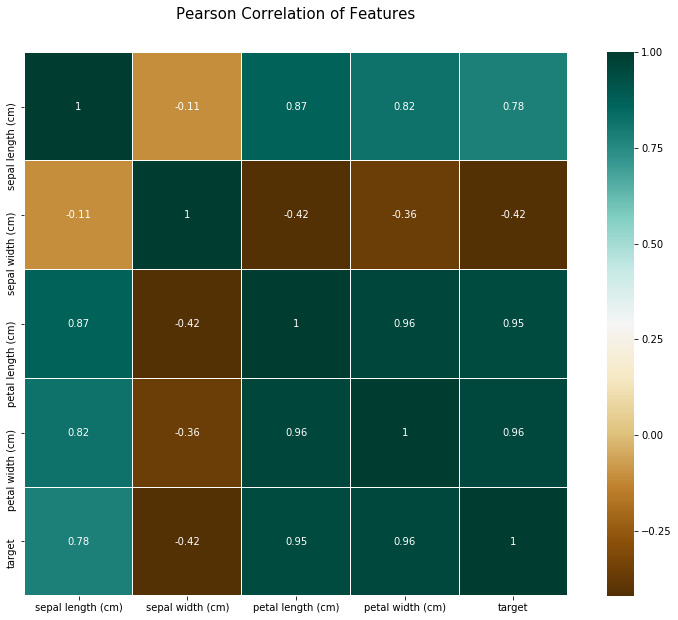

In [2]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), cmap = "BrBG", 
            linewidths=0.1, square=True, linecolor='white', 
            annot=True)

In [3]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分(1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(iris['data'], 
                                                                    iris['target'], 
                                                                    test_size=0.1)

### Step 2. 分類器

通常我們在選k值的時候，是用經驗法則在選擇

但一個通常的規則，不要選太少(小於3)，因為你選不夠多人，就無法達到多數決的效果

也不要選太多(大於20)，因為這樣選出來的範圍太大，沒有找鄰居的效果！

In [4]:
from sklearn.neighbors import KNeighborsClassifier
# 我喜歡先從8個鄰居開始試試看
clf = KNeighborsClassifier(n_neighbors=8)
clf = clf.fit(data_train, target_train)

### Step 3. 開始預測

使用你剛剛的classifier進行predict，predict完成以後使用sklearn內建的accuracy_score來算出正確機率

In [5]:
from sklearn.metrics import accuracy_score

predict = clf.predict(data_test)
print("預測:", predict)
print("正確標籤:", target_test)
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測: [2 0 2 1 2 1 1 2 0 0 0 2 0 0 1]
正確標籤: [2 0 2 1 2 1 1 2 0 0 0 2 0 0 1]
正確率:  100.0 %


### Step 4. 確認一下分類錯誤

一樣確認一下混淆矩陣

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, predict)
pd.DataFrame(cm)

,0,1,2
0,6,0,0
1,0,4,0
2,0,0,5


## ✔ 優缺點

### 優點

1. 非常直覺
2. 計算量不管你的資料多大，始終都是看你找幾個鄰居這麼大而已

### 缺點

1. 解釋性非常差，大概就跟你說“xxx都這樣，所以我也要這樣”一樣差！
2. 如果你的標籤數量本來就不平均，譬如A類100個，B類5個，你很難正確的分到B類
3. 並沒有考慮整體資料，只考慮的附近的資料